# Libraries

In [75]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from typing import List, Dict, Tuple, Optional, Any
import joblib
from datetime import datetime
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

# Loading and analyzing the Datasets

there are datasets that have anomaly column

In [3]:
folder_path = "train_splits"

In [5]:
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
files

['train_102.csv',
 'train_103.csv',
 'train_105.csv',
 'train_110.csv',
 'train_115.csv',
 'train_118.csv',
 'train_119.csv',
 'train_12.csv',
 'train_131.csv',
 'train_141.csv',
 'train_151.csv',
 'train_153.csv',
 'train_155.csv',
 'train_161.csv',
 'train_165.csv',
 'train_176.csv',
 'train_177.csv',
 'train_185.csv',
 'train_188.csv',
 'train_198.csv',
 'train_200.csv',
 'train_204.csv',
 'train_205.csv',
 'train_209.csv',
 'train_21.csv',
 'train_211.csv',
 'train_212.csv',
 'train_217.csv',
 'train_218.csv',
 'train_227.csv',
 'train_23.csv',
 'train_242.csv',
 'train_246.csv',
 'train_251.csv',
 'train_256.csv',
 'train_272.csv',
 'train_287.csv',
 'train_29.csv',
 'train_290.csv',
 'train_294.csv',
 'train_297.csv',
 'train_300.csv',
 'train_301.csv',
 'train_306.csv',
 'train_310.csv',
 'train_314.csv',
 'train_321.csv',
 'train_325.csv',
 'train_335.csv',
 'train_338.csv',
 'train_348.csv',
 'train_352.csv',
 'train_354.csv',
 'train_361.csv',
 'train_367.csv',
 'train_370.cs

In [7]:
dataframes = {file.split('.')[0]: pd.read_csv(os.path.join(folder_path, file)) for file in files}

In [8]:
dataset_id = list(dataframes.keys())[0]  
dataframes[dataset_id].head()

,value,timestamp
0,0.450116,2021-07-01
1,-0.393450,2021-07-02
2,-0.853038,2021-07-03
3,-0.865014,2021-07-04
4,0.014318,2021-07-05


In [132]:
dataset_id = list(dataframes.keys())[1]  
dataframes[dataset_id].head(10)

,value,timestamp,anomaly
0,0.442091,2021-07-01 00:00:00,False
1,0.437336,2021-07-01 06:00:00,False
2,0.427584,2021-07-01 12:00:00,False
3,0.395056,2021-07-01 18:00:00,False
4,-0.384495,2021-07-02 00:00:00,False
5,-0.474306,2021-07-02 06:00:00,False
6,-0.444635,2021-07-02 12:00:00,False
7,-0.425308,2021-07-02 18:00:00,False
8,NaN,2021-07-03 00:00:00,False
9,-0.934601,2021-07-03 06:00:00,False


In [133]:
dataset_id = list(dataframes.keys())[90]  
dataframes[dataset_id].head(10)

,value,timestamp,anomaly
0,0.494721,2021-07-01,False
1,-0.404032,2021-07-02,False
2,-1.163047,2021-07-03,False
3,-0.681996,2021-07-04,False
4,0.009059,2021-07-05,False
5,0.860410,2021-07-06,False
6,1.122985,2021-07-07,False
7,0.104434,2021-07-08,True
8,-0.487820,2021-07-09,False
9,-1.126482,2021-07-10,False


In [134]:
dataset_id = list(dataframes.keys())[60]  
dataframes[dataset_id].head()

,value,timestamp
0,-0.949384,2021-07-01
1,-0.951077,2021-07-02
2,-1.110809,2021-07-03
3,-0.855162,2021-07-04
4,-0.866653,2021-07-05


In [136]:
dataset_id = list(dataframes.keys())[80]  
dataframes[dataset_id].head()

,value,timestamp
0,1.038468,2021-07-01
1,0.996368,2021-07-02
2,0.968609,2021-07-03
3,0.928459,2021-07-04
4,NaN,2021-07-05


In [142]:
dataset_sizes = [df.shape[0] for df in dataframes.values()]
for i, size in enumerate(dataset_sizes):
    print(f"Dataset {i+1}: {size} rows")

Dataset 1: 147 rows
Dataset 2: 252 rows
Dataset 3: 256 rows
Dataset 4: 672 rows
Dataset 5: 630 rows
Dataset 6: 15120 rows
Dataset 7: 42 rows
Dataset 8: 18144 rows
Dataset 9: 9072 rows
Dataset 10: 504 rows
Dataset 11: 441 rows
Dataset 12: 504 rows
Dataset 13: 15120 rows
Dataset 14: 3528 rows
Dataset 15: 1022 rows
Dataset 16: 441 rows
Dataset 17: 15120 rows
Dataset 18: 672 rows
Dataset 19: 189 rows
Dataset 20: 15120 rows
Dataset 21: 9072 rows
Dataset 22: 504 rows
Dataset 23: 12264 rows
Dataset 24: 15120 rows
Dataset 25: 231 rows
Dataset 26: 24192 rows
Dataset 27: 3024 rows
Dataset 28: 105 rows
Dataset 29: 15120 rows
Dataset 30: 36792 rows
Dataset 31: 1022 rows
Dataset 32: 12096 rows
Dataset 33: 168 rows
Dataset 34: 126 rows
Dataset 35: 30240 rows
Dataset 36: 7056 rows
Dataset 37: 10080 rows
Dataset 38: 15120 rows
Dataset 39: 9072 rows
Dataset 40: 1008 rows
Dataset 41: 105 rows
Dataset 42: 2016 rows
Dataset 43: 42 rows
Dataset 44: 8064 rows
Dataset 45: 840 rows
Dataset 46: 168 rows
Datase

In [144]:
print(f"Maximum dataset size: {max(dataset_sizes)} rows")
print(f"Minimum dataset size: {min(dataset_sizes)} rows")

Maximum dataset size: 36792 rows
Minimum dataset size: 42 rows


In [78]:
# Count datasets with both 'value' and 'timestamp' columns
valid_datasets_count = sum(
    {'value', 'timestamp'}.issubset(df.columns) for df in dataframes.values()
)

print(f"Total number of datasets with both 'value' and 'timestamp' columns: {valid_datasets_count}")

Total number of datasets with both 'value' and 'timestamp' columns: 96


In [80]:
# Count datasets with the 'anomaly' column
anomaly_datasets_count = sum(
    {'anomaly'}.issubset(df.columns) for df in dataframes.values()
)

print(f"Total number of datasets with the 'anomaly' column: {anomaly_datasets_count}")

Total number of datasets with the 'anomaly' column: 46


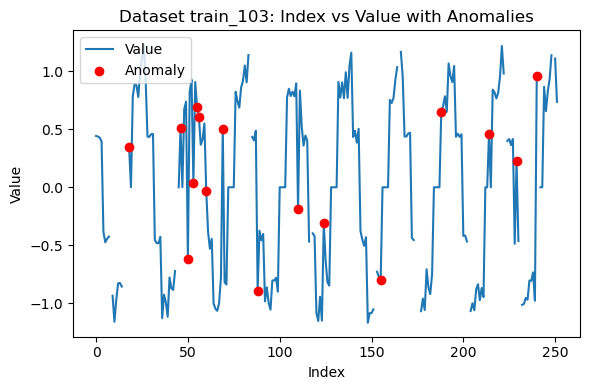

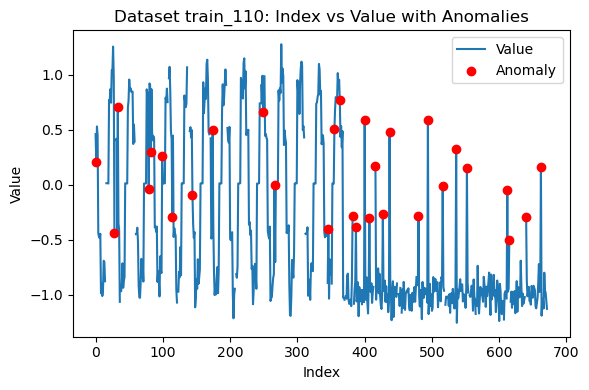

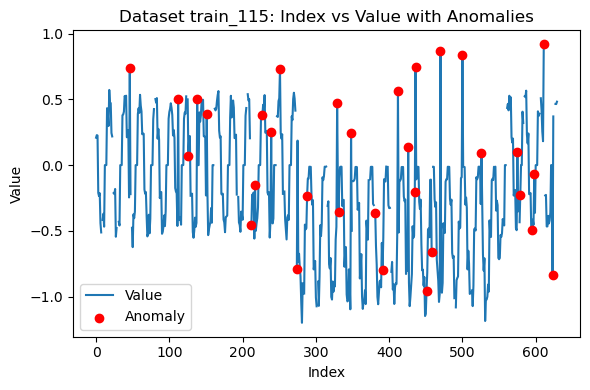

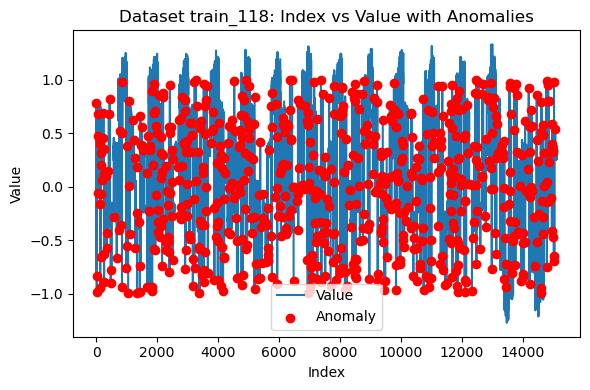

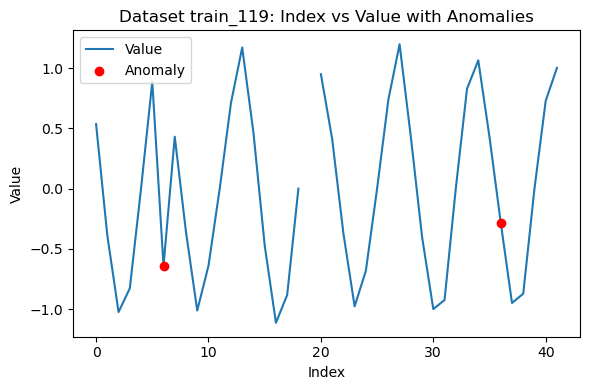

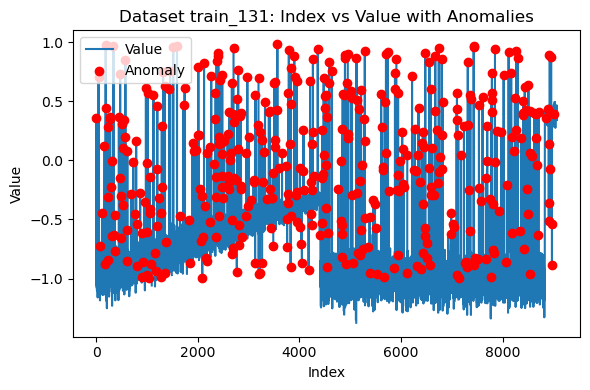

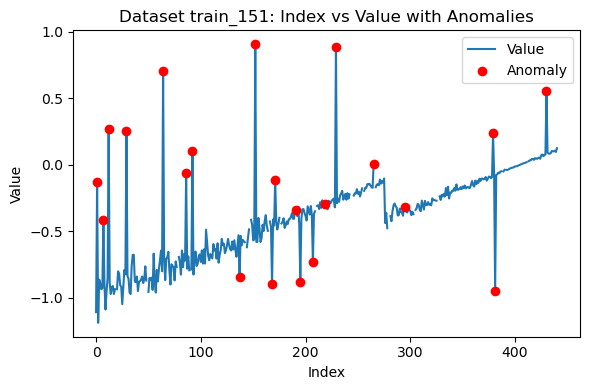

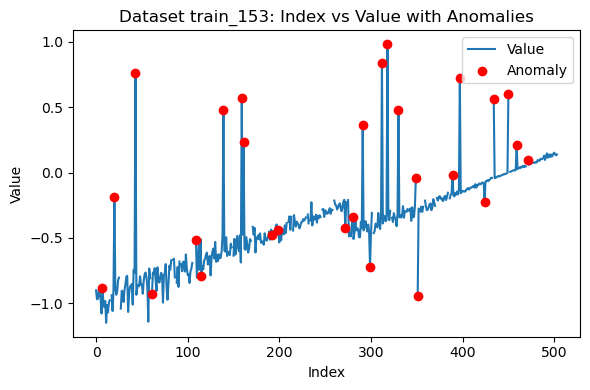

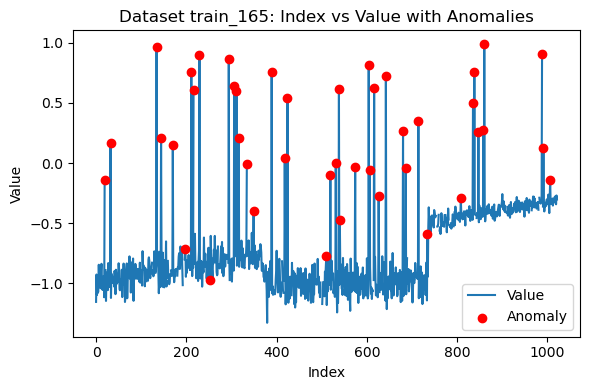

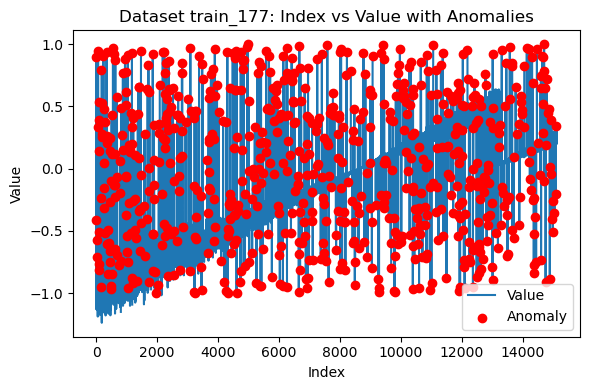

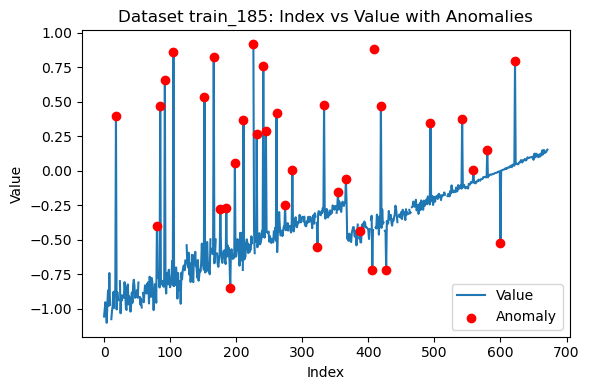

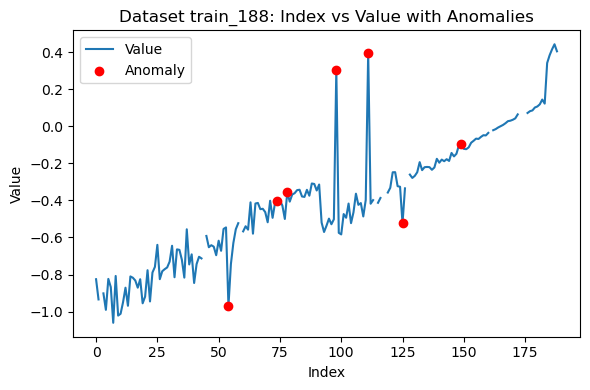

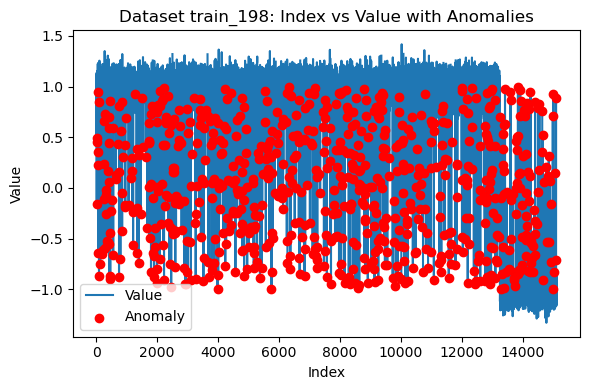

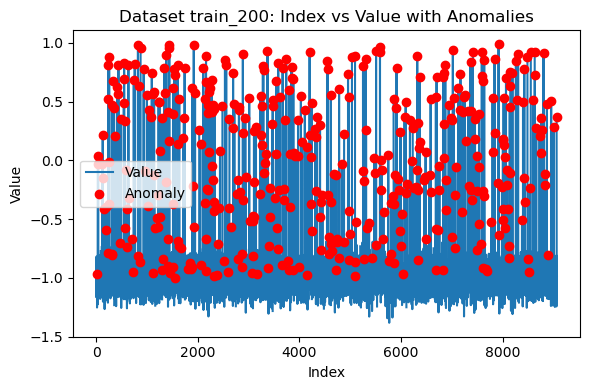

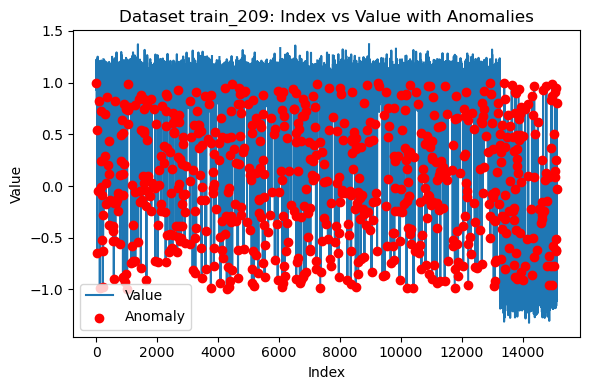

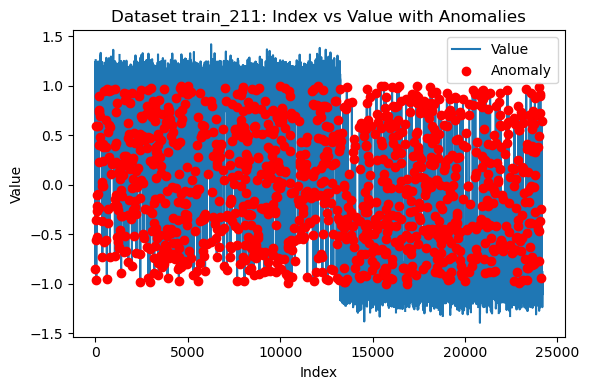

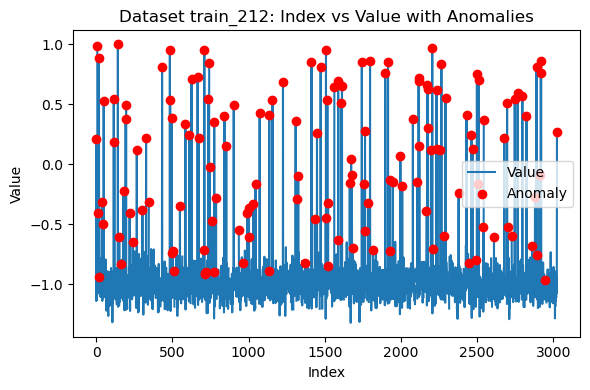

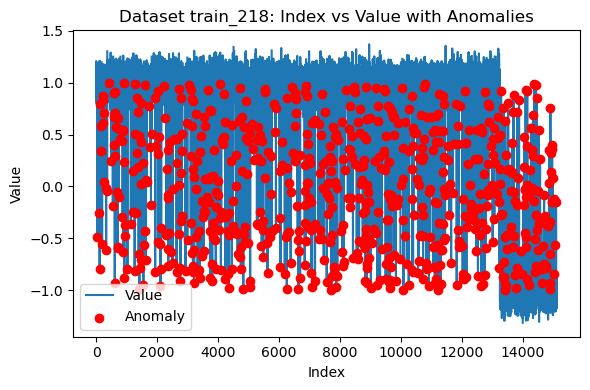

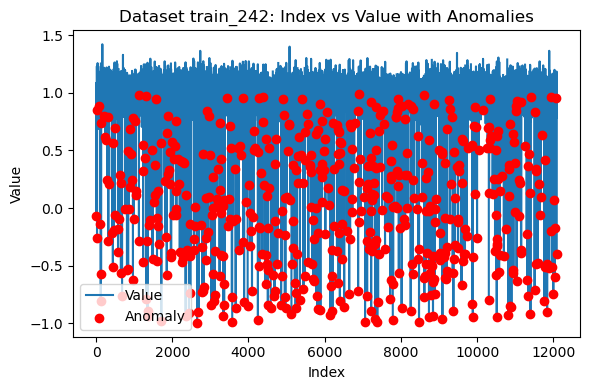

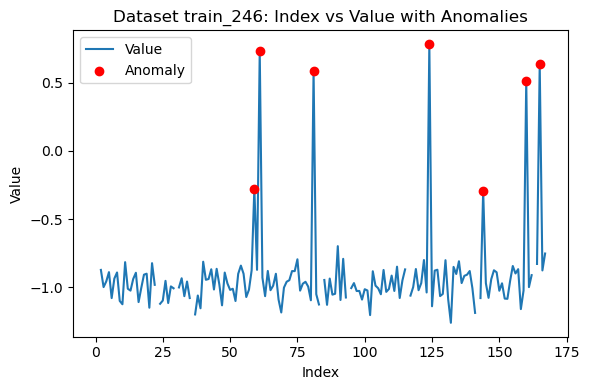

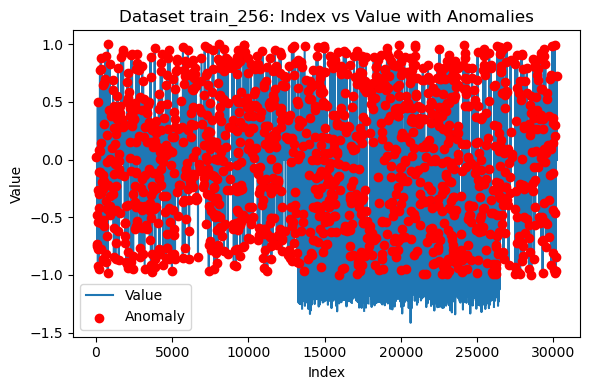

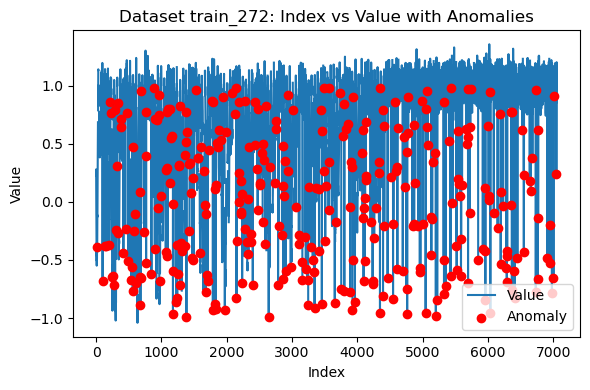

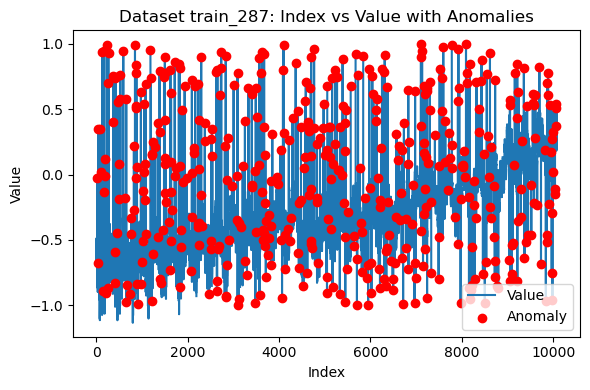

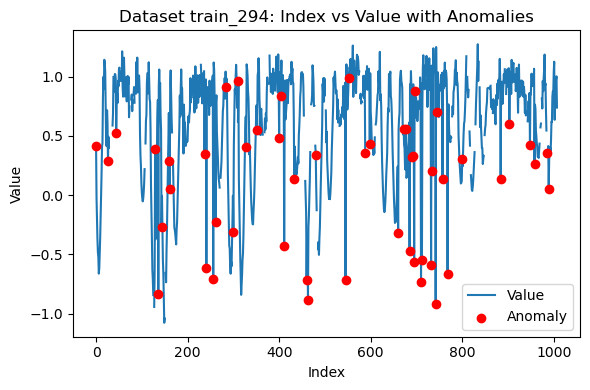

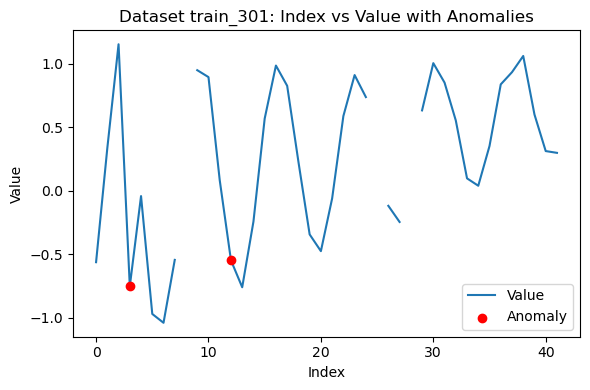

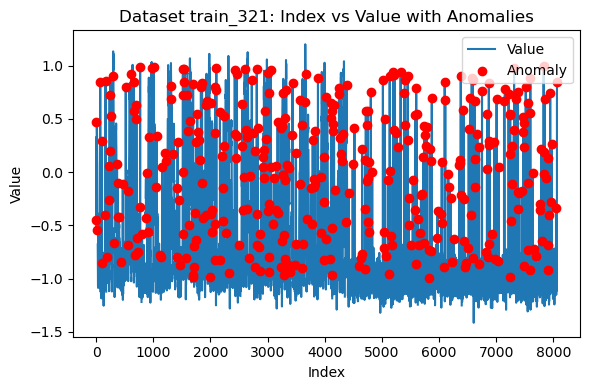

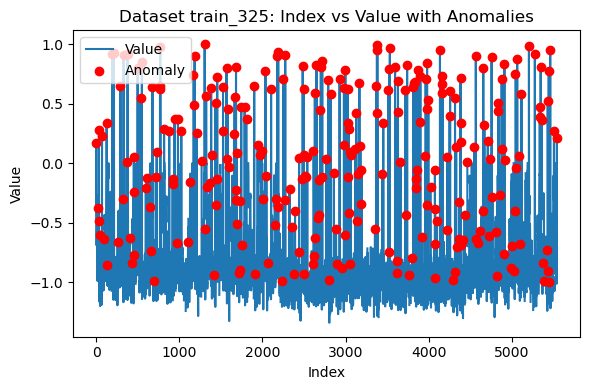

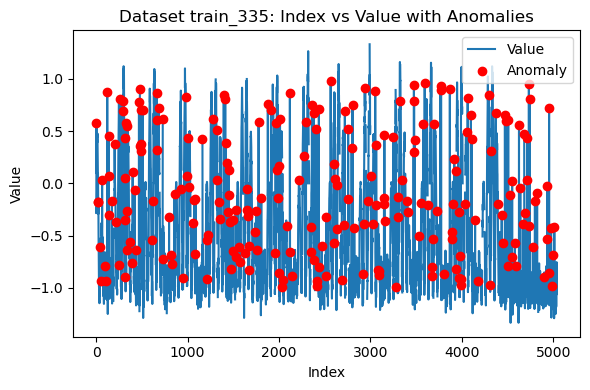

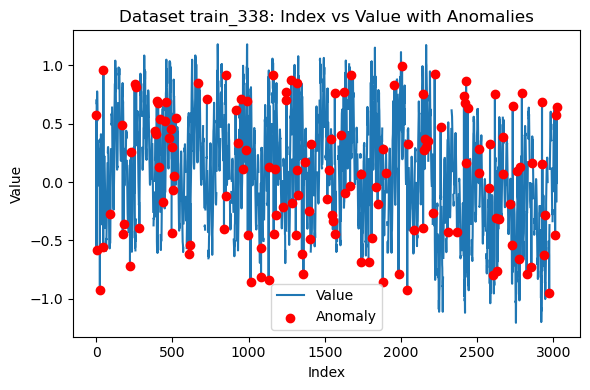

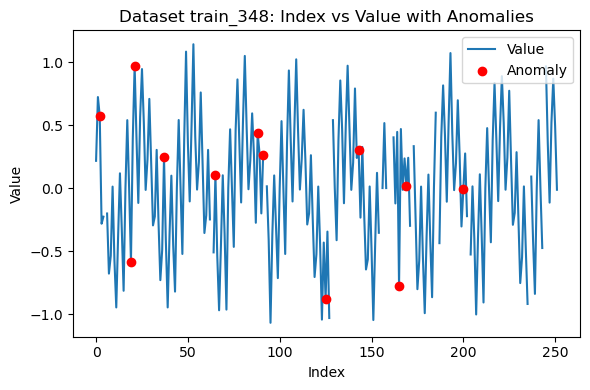

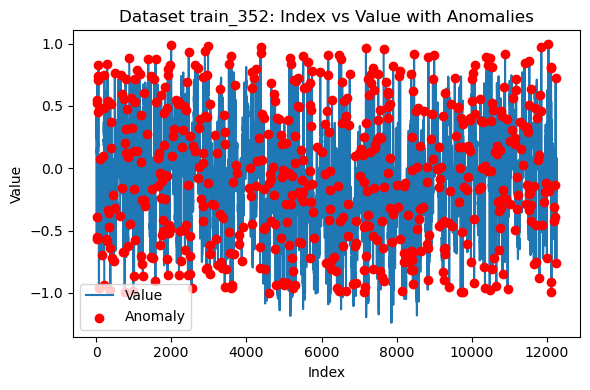

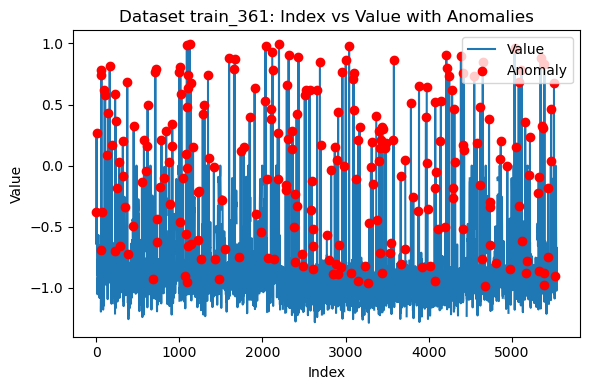

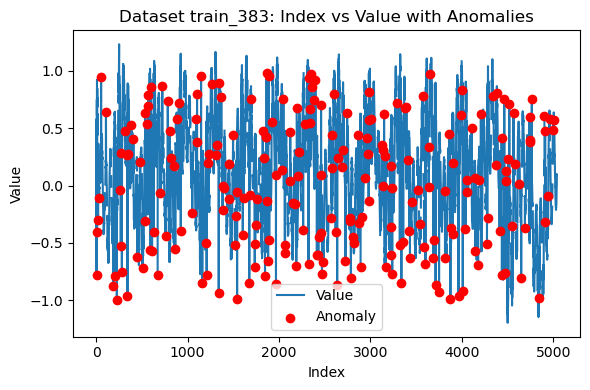

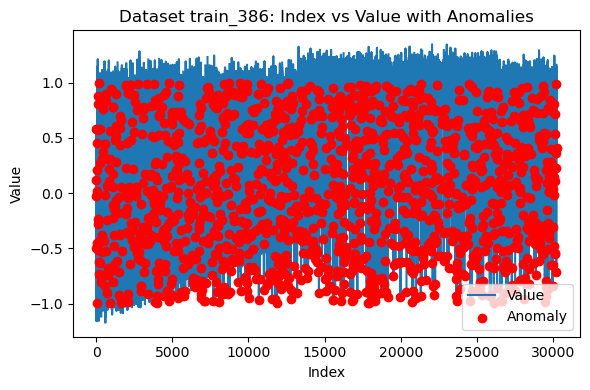

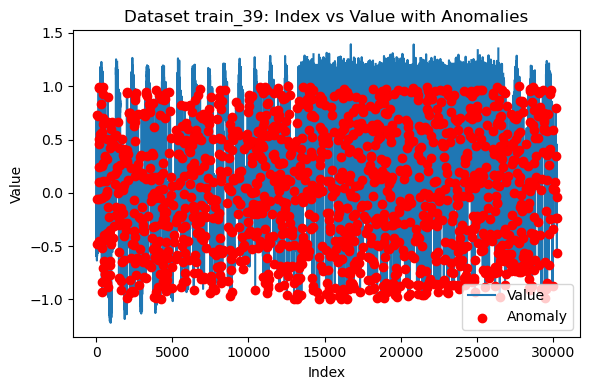

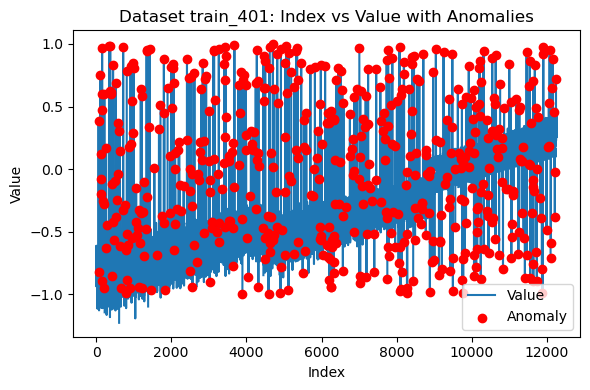

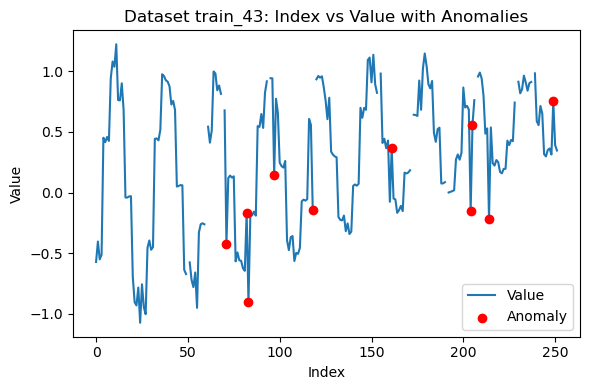

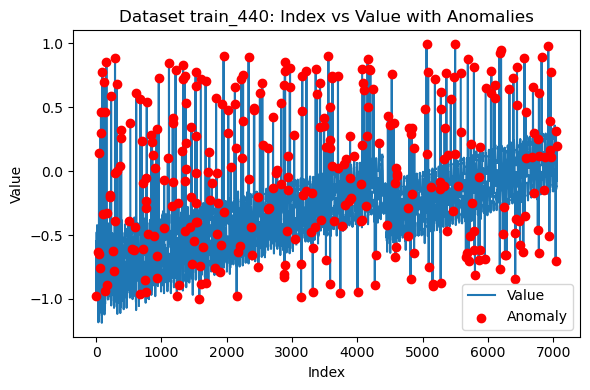

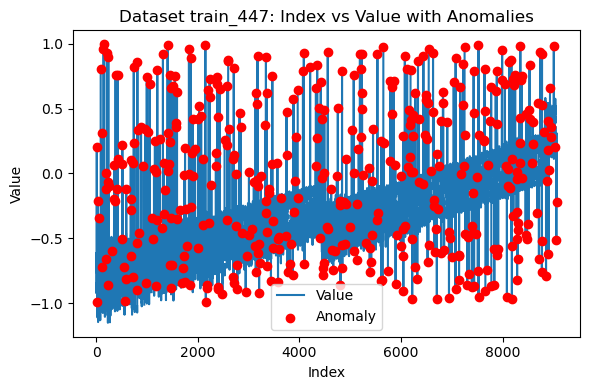

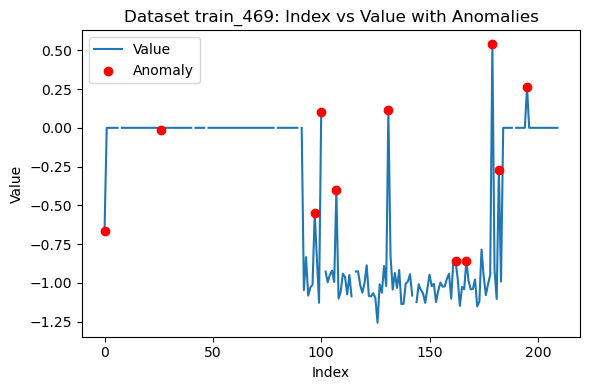

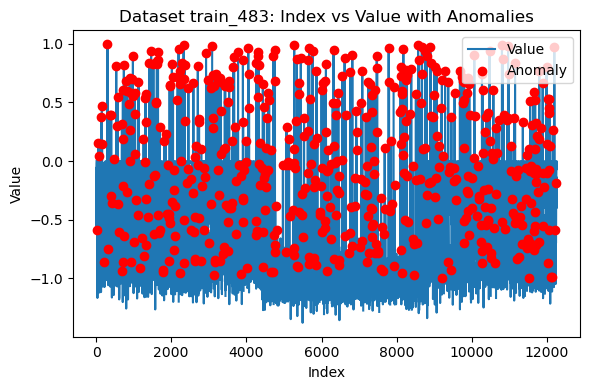

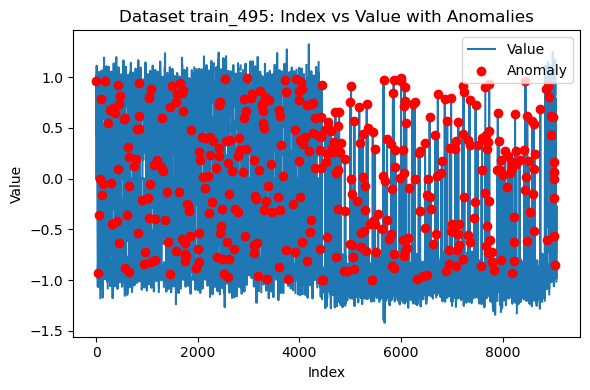

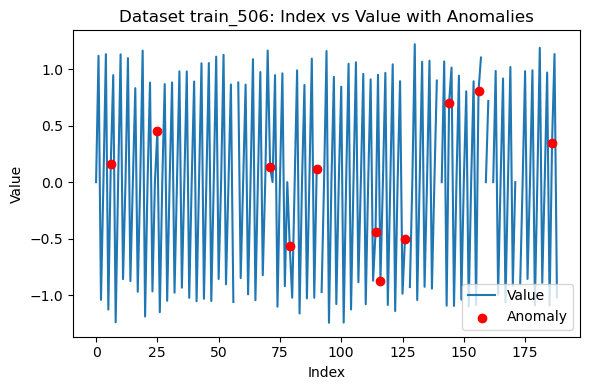

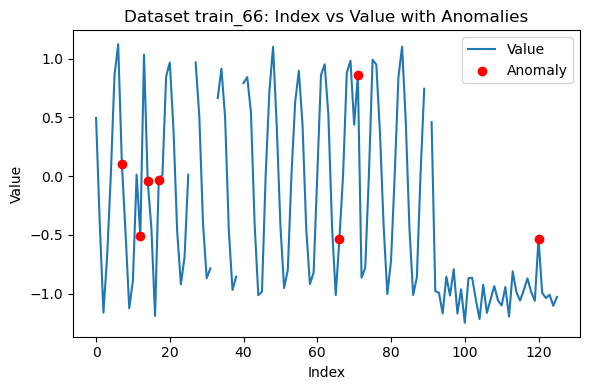

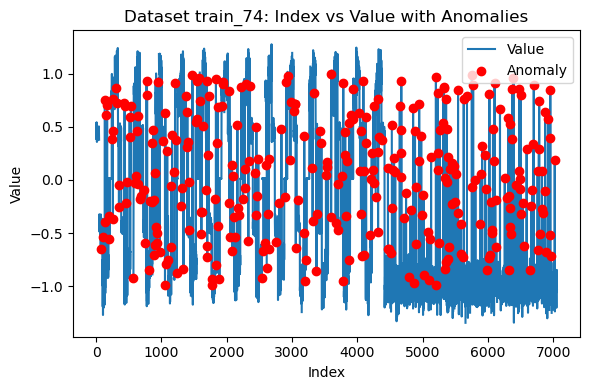

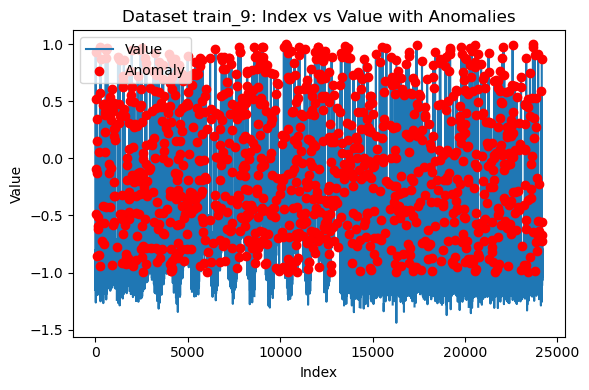

In [82]:
import matplotlib.pyplot as plt

# Assuming `dataframes` is a dictionary containing the datasets

# Loop over the datasets and check if 'anomaly' column exists
for dataset_id, df in dataframes.items():
    if 'anomaly' in df.columns:
        # Create a smaller figure by adjusting the figsize (e.g., (6, 4))
        plt.figure(figsize=(6, 4))
        
        # Plot the values, using the index as the x-axis
        plt.plot(df.index, df['value'], label='Value')
        
        # Highlight anomalies with a different marker
        anomalies = df[df['anomaly'] == 1]
        plt.scatter(anomalies.index, anomalies['value'], color='red', label='Anomaly', zorder=5)

        # Set title and labels
        plt.title(f"Dataset {dataset_id}: Index vs Value with Anomalies")
        plt.xlabel('Index')
        plt.ylabel('Value')

        # Add a legend
        plt.legend()

        # Show the plot
        plt.tight_layout()
        plt.show()

# Preprocessing the Datasets

Acorrding to my analysis:
1. Some datasets have the timestamp as date only, time not included
2. 46/96 datasets have the col anomaly
3. other datasets may have outliers that shall be detected and handled
4. There are NaN values that should be handled
5. Datasets have different row sizes thus each should have variable window size/lags

In [77]:
class TimeSeriesPreprocessor:
    def __init__(self):
        self.scalers = {}
        self.max_lags = {}
        self.selected_lags = {}  # Store selected lags for each dataset
        
    def standardize_timestamp(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        if 'timestamp' in df.columns:
            df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
        return df
    
    def handle_missing_values(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.interpolate(method='linear')
        df = df.ffill()
        df = df.bfill()
        return df

    def select_significant_lags(self, series: pd.Series, max_lags: int = 50, threshold: float = 0.1) -> List[int]:
        """
        Select significant lags based on PACF values.
        
        Parameters:
        - series: Time series data
        - max_lags: Maximum number of lags to consider
        - threshold: Significance threshold for PACF values
        
        Returns:
        - List of significant lag values
        """
        try:
            # Calculate PACF values
            pacf_values, confidence_intervals = pacf(series.dropna(), nlags=max_lags, alpha=0.05)
            
            # Find significant lags (excluding lag 0)
            significant_lags = [
                i for i in range(1, len(pacf_values))
                if abs(pacf_values[i]) > threshold
            ]
            
            # If no significant lags found, return at least lag 1
            if not significant_lags:
                return [1]
            
            return sorted(significant_lags)
        
        except Exception as e:
            print(f"Error in PACF calculation: {str(e)}")
            # Fallback to default lag 1 if PACF calculation fails
            return [1]
    
    def get_window_size(self, df: pd.DataFrame, max_window_percentage: float = 0.2) -> int:
        window_size = max(int(len(df) * max_window_percentage), 1)
        return window_size

    def create_features(self, df: pd.DataFrame, dataset_id: str, n_lags: Optional[int] = None, drop_na: bool = True) -> Tuple[pd.DataFrame, List[str]]:
        features = []
        
        # Use PACF to select significant lags if n_lags not provided
        if n_lags is None:
            max_possible_lags = min(int(len(df) * 0.2), 50)  # Consider up to 20% of data points or max 50
            significant_lags = self.select_significant_lags(
                df['value'],
                max_lags=max_possible_lags,
                threshold=0.1
            )
            self.selected_lags[dataset_id] = significant_lags
            print(f"Selected significant lags for dataset {dataset_id}: {significant_lags}")
        else:
            significant_lags = list(range(1, n_lags + 1))
            self.selected_lags[dataset_id] = significant_lags
        
        # Create lag features only for significant lags
        for lag in significant_lags:
            lag_col = f'lag_{lag}'
            df[lag_col] = df['value'].shift(lag)
            features.append(lag_col)
        
        # Add time-based features
        df['hour'] = df['timestamp'].dt.hour
        df['day_of_week'] = df['timestamp'].dt.dayofweek
        df['month'] = df['timestamp'].dt.month
        df['day_of_year'] = df['timestamp'].dt.dayofyear
        df['is_weekend'] = df['timestamp'].dt.weekday >= 5
        features.extend(['hour', 'day_of_week', 'month', 'day_of_year', 'is_weekend'])
        
        if drop_na:
            df = df.dropna()
        
        return df, features

    def get_dynamic_window_size(self, df: pd.DataFrame, min_window_size: int = 5, max_window_size: int = 50, window_percentage: float = 0.05) -> int:
        window_size = int(len(df) * window_percentage)
        window_size = max(min_window_size, window_size)
        window_size = min(max_window_size, window_size)
        return window_size

    def add_rolling_features(self, df: pd.DataFrame, min_window_size: int = 5, max_window_size: int = 50, window_percentage: float = 0.05) -> pd.DataFrame:
        window_size = self.get_dynamic_window_size(df, min_window_size, max_window_size, window_percentage)

        df[f'rolling_mean_{window_size}'] = df['value'].rolling(window=window_size).mean()
        df[f'rolling_std_{window_size}'] = df['value'].rolling(window=window_size).std()
        df[f'rolling_min_{window_size}'] = df['value'].rolling(window=window_size).min()
        df[f'rolling_max_{window_size}'] = df['value'].rolling(window=window_size).max()
        df[f'rolling_median_{window_size}'] = df['value'].rolling(window=window_size).median()
        df[f'rolling_sum_{window_size}'] = df['value'].rolling(window=window_size).sum()

        df = df.bfill().ffill()

        return df
    
    def preprocess(self, df: pd.DataFrame, dataset_id: str, n_lags: Optional[int] = None) -> Tuple[pd.DataFrame, List[str]]:
        df = self.standardize_timestamp(df)
        df = self.handle_missing_values(df)
        df, features = self.create_features(df, dataset_id, n_lags)
        df = self.add_rolling_features(df)
        
        return df, features

# try

In [11]:
# class TimeSeriesPreprocessor:
#     def __init__(self):
#         self.scalers = {}
#         self.max_lags = {}
        
#     def standardize_timestamp(self, df: pd.DataFrame) -> pd.DataFrame:
#         # Ensure timestamp is in datetime format.
#         df = df.copy()
#         if 'timestamp' in df.columns:
#             df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')  # Handling invalid dates
#         return df
    
#     def handle_missing_values(self, df: pd.DataFrame) -> pd.DataFrame:
#         # Handle missing values using interpolation.
#         df = df.interpolate(method='linear') 
#         df = df.ffill()  # Forward fill
#         df = df.bfill()  # Backward fill
#         return df
    
#     def get_window_size(self, df: pd.DataFrame, max_window_percentage: float = 0.2) -> int:
#         # Determine dynamic window size based on dataset size.
#         window_size = max(int(len(df) * max_window_percentage), 1)  # Ensure at least 1 data point
#         return window_size

#     def create_features(self, df: pd.DataFrame, dataset_id: str, n_lags: Optional[int] = None, drop_na: bool = True) -> pd.DataFrame:
#         # Create lag and time-based features dynamically.
#         features = []
        
#         # Determine dynamic lags if not provided
#         if n_lags is None:
#             n_lags = min(int(len(df) * 0.1), 24)  # 10% of data points or max 24
#             self.max_lags[dataset_id] = n_lags
            
#         # Get dynamic window size
#         window_size = self.get_window_size(df)  # Get dynamic window size for each dataset
        
#         for i in range(1, n_lags + 1):
#             df[f'lag_{i}'] = df['value'].shift(i)
#             features.append(f'lag_{i}')
        
#         # Add time-based features
#         df['hour'] = df['timestamp'].dt.hour
#         df['day_of_week'] = df['timestamp'].dt.dayofweek
#         df['month'] = df['timestamp'].dt.month
#         df['day_of_year'] = df['timestamp'].dt.dayofyear
#         df['is_weekend'] = df['timestamp'].dt.weekday >= 5
#         features.extend(['hour', 'day_of_week', 'month', 'day_of_year', 'is_weekend'])
        
#         if drop_na:
#             df = df.dropna()

#         print(f"Window Size for dataset {dataset_id}: {window_size}")
        
#         return df, features

#     def get_dynamic_window_size(self, df: pd.DataFrame, min_window_size: int = 5, max_window_size: int = 50, window_percentage: float = 0.05) -> int:
#         """
#         Calculate dynamic window size based on dataset size.
        
#         Parameters:
#         - df: The dataframe containing the time series data.
#         - min_window_size: Minimum window size (default is 5).
#         - max_window_size: Maximum window size (default is 50).
#         - window_percentage: Percentage of the dataset size to determine window size (default is 5%).
        
#         Returns:
#         - window_size: The dynamically calculated window size.
#         """
#         # Calculate window size as a percentage of dataset size
#         window_size = int(len(df) * window_percentage)
        
#         # Ensure the window size is within the specified bounds
#         window_size = max(min_window_size, window_size)
#         window_size = min(max_window_size, window_size)
        
#         return window_size

#     def add_rolling_features(self, df: pd.DataFrame, min_window_size: int = 5, max_window_size: int = 50, window_percentage: float = 0.05) -> pd.DataFrame:
#         """
#         Adds rolling window features to the dataframe with a dynamic window size.
        
#         Parameters:
#         - df: The dataframe containing the time series data.
#         - min_window_size: Minimum window size (default is 5).
#         - max_window_size: Maximum window size (default is 50).
#         - window_percentage: Percentage of the dataset size to determine window size (default is 5%).
        
#         Returns:
#         - df: The dataframe with rolling window features added.
#         """
#         # Calculate dynamic window size
#         window_size = self.get_dynamic_window_size(df, min_window_size, max_window_size, window_percentage)

#         # Add rolling features using the calculated window size
#         df[f'rolling_mean_{window_size}'] = df['value'].rolling(window=window_size).mean()
#         df[f'rolling_std_{window_size}'] = df['value'].rolling(window=window_size).std()
#         df[f'rolling_min_{window_size}'] = df['value'].rolling(window=window_size).min()
#         df[f'rolling_max_{window_size}'] = df['value'].rolling(window=window_size).max()
#         df[f'rolling_median_{window_size}'] = df['value'].rolling(window=window_size).median()
#         df[f'rolling_sum_{window_size}'] = df['value'].rolling(window=window_size).sum()

#         # Handle NaN values (could be forward fill, backward fill, or drop)
#         df = df.bfill().ffill()  # Updated to use bfill() and ffill() methods explicitly

#         return df
    
#     def preprocess(self, df: pd.DataFrame, dataset_id: str, n_lags: Optional[int] = None) -> pd.DataFrame:
#         # Apply all preprocessing steps including rolling features.
#         df = self.standardize_timestamp(df)
#         df = self.handle_missing_values(df)
#         df, features = self.create_features(df, dataset_id, n_lags)
        
#         # Add rolling window features with dynamic window size
#         df = self.add_rolling_features(df, min_window_size=5, max_window_size=50, window_percentage=0.05)
        
#         return df, features

In [33]:
# class TimeSeriesPreprocessor:
#     def __init__(self):
#         self.scalers = {}
#         self.max_lags = {}
        
#     def standardize_timestamp(self, df: pd.DataFrame) -> pd.DataFrame:
#         # Ensure timestamp is in datetime format.
#         df = df.copy()
#         if 'timestamp' in df.columns:
#             df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')  # Handling invalid dates
#         return df
    
#     def handle_missing_values(self, df: pd.DataFrame) -> pd.DataFrame:
#         # Handle missing values using interpolation.
#         df = df.interpolate(method='linear') 
#         df = df.ffill()  # Forward fill
#         df = df.bfill()  # Backward fill
#         return df
    
#     def get_window_size(self, df: pd.DataFrame, max_window_percentage: float = 0.2) -> int:
#         # Determine dynamic window size based on dataset size.
#         window_size = max(int(len(df) * max_window_percentage), 1)  # Ensure at least 1 data point
#         return window_size

#     def create_features(self, df: pd.DataFrame, dataset_id: str, n_lags: Optional[int] = None, drop_na: bool = True) -> pd.DataFrame:
#         # Create lag and time-based features dynamically.
#         features = []
        
#         # Determine dynamic lags if not provided
#         if n_lags is None:
#             n_lags = min(int(len(df) * 0.1), 24)  # 10% of data points or max 24
#             self.max_lags[dataset_id] = n_lags
            
#         # Get dynamic window size
#         window_size = self.get_window_size(df)  # Get dynamic window size for each dataset
        
#         for i in range(1, n_lags + 1):
#             df[f'lag_{i}'] = df['value'].shift(i)
#             features.append(f'lag_{i}')
        
#         # Add time-based features
#         df['hour'] = df['timestamp'].dt.hour
#         df['day_of_week'] = df['timestamp'].dt.dayofweek
#         df['month'] = df['timestamp'].dt.month
#         df['day_of_year'] = df['timestamp'].dt.dayofyear
#         df['is_weekend'] = df['timestamp'].dt.weekday >= 5
#         features.extend(['hour', 'day_of_week', 'month', 'day_of_year', 'is_weekend'])
        
#         if drop_na:
#             df = df.dropna()

#         print(f"Window Size for dataset {dataset_id}: {window_size}")
        
#         return df, features
    
#     def preprocess(self, df: pd.DataFrame, dataset_id: str) -> pd.DataFrame:
#         # Applying my preprocessing steps.
#         df = self.standardize_timestamp(df)
#         df = self.handle_missing_values(df)
#         df, features = self.create_features(df, dataset_id)
#         return df, features


In [ ]:
# class TimeSeriesPreprocessor:
#     def __init__(self):
#         self.scalers = {}
#         self.max_lags = {}
        
#     def _standardize_timestamp(self, df: pd.DataFrame) -> pd.DataFrame:
#         """Ensure timestamp is in datetime format."""
#         df = df.copy()
#         if 'timestamp' in df.columns:
#             df['timestamp'] = pd.to_datetime(df['timestamp'])
#         return df
    
#     def _handle_missing_values(self, df: pd.DataFrame) -> pd.DataFrame:
#         """Handle missing values using interpolation."""
#         return df.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
    
#     def _create_features(self, df: pd.DataFrame, dataset_id: str, n_lags: Optional[int] = None) -> pd.DataFrame:
#         """Create lag and time-based features dynamically."""
#         features = []
        
#         # Determine dynamic lags if not provided
#         if n_lags is None:
#             n_lags = min(int(len(df) * 0.1), 24)  # 10% of data points or max 24
#             self.max_lags[dataset_id] = n_lags
            
#         for i in range(1, n_lags + 1):
#             df[f'lag_{i}'] = df['value'].shift(i)
#             features.append(f'lag_{i}')
        
#         # Add time-based features
#         df['hour'] = df['timestamp'].dt.hour
#         df['day_of_week'] = df['timestamp'].dt.dayofweek
#         df['month'] = df['timestamp'].dt.month
#         features.extend(['hour', 'day_of_week', 'month'])
        
#         return df.dropna(), features
    
#     def preprocess(self, df: pd.DataFrame, dataset_id: str) -> pd.DataFrame:
#         """Apply all preprocessing steps."""
#         df = self._standardize_timestamp(df)
#         df = self._handle_missing_values(df)
#         df, features = self._create_features(df, dataset_id)
#         return df, features

In [ ]:
# # Handle Missing Values in 'value'
# df['value'].fillna(method='ffill', inplace=True)  # Forward fill
# df['value'].fillna(method='bfill', inplace=True)  # Backward fill for initial NaNs

# # Handle Missing or Invalid Timestamps
# df.dropna(subset=['timestamp'], inplace=True)  # Drop rows with invalid timestamps


# Training

In [79]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [81]:
def get_models_and_params():
    """Define and return the models with their parameter grids for grid search."""
    return {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [5, 10, 15, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'GradientBoosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7],
                'min_samples_split': [2, 5, 10]
            }
        },
        'DecisionTree': {
            'model': DecisionTreeRegressor(random_state=42),
            'params': {
                'max_depth': [5, 10, 15, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'criterion': ['squared_error', 'friedman_mse']
            }
        }
    }

In [83]:
def calculate_metrics(y_true: np.ndarray, y_pred: np.ndarray) -> Dict[str, float]:
    """Calculate multiple evaluation metrics."""
    return {
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }

In [85]:
def evaluate_single_model_with_grid_search(
    model_info: Dict[str, Any],
    X: pd.DataFrame,
    y: pd.Series,
    tscv: TimeSeriesSplit
) -> Tuple[Any, Dict[str, float], Dict[str, Any]]:
    """Evaluate a single model using grid search and time series cross-validation."""
    try:
        grid_search = GridSearchCV(
            estimator=model_info['model'],
            param_grid=model_info['params'],
            cv=tscv,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
            verbose=1
        )
        
        grid_search.fit(X, y)
        
        # Get the best model
        best_model = grid_search.best_estimator_
        
        # Make predictions with the best model
        y_pred = grid_search.predict(X)
        metrics = calculate_metrics(y, y_pred)
        
        return best_model, metrics, grid_search.best_params_
    
    except Exception as e:
        warnings.warn(f"Error during model evaluation: {str(e)}")
        return None, None, None

In [87]:
def evaluate_models(X: pd.DataFrame, y: pd.Series, n_splits: int = 5) -> Tuple[Any, str, Dict[str, float], Dict[str, Any]]:
    """Evaluate all models using grid search and return the best one based on RMSE."""
    models = get_models_and_params()
    best_model = None
    best_score = float('inf')
    best_model_name = ''
    best_metrics = {}
    best_params = {}
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    for name, model_info in models.items():
        print(f"\nEvaluating {name} with grid search...")
        model, metrics, params = evaluate_single_model_with_grid_search(model_info, X, y, tscv)
        
        if metrics is None:
            print(f"Skipping {name} due to evaluation error")
            continue
            
        print(f"Best parameters for {name}:")
        print(params)
        print("\nMetrics:")
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value:.4f}")
        
        # Use RMSE as the primary metric for model selection
        if metrics['RMSE'] < best_score:
            best_score = metrics['RMSE']
            best_model = model
            best_model_name = name
            best_metrics = metrics
            best_params = params
    
    print(f"\nBest Model: {best_model_name}")
    print("Best Model Parameters:")
    print(best_params)
    print("\nBest Model Metrics:")
    for metric_name, value in best_metrics.items():
        print(f"{metric_name}: {value:.4f}")
    
    return best_model, best_model_name, best_metrics, best_params

In [89]:
def train_and_save_models(
    dataframes: Dict[str, pd.DataFrame],
    preprocessor: Any,
    folder_path: str
) -> Dict[str, Dict[str, Any]]:
    """Train and save models for multiple datasets using grid search."""
    results = {}
    os.makedirs(folder_path, exist_ok=True)
    
    for dataset_id, df in dataframes.items():
        print(f"\nProcessing dataset: {dataset_id}")
        try:
            # Preprocessing
            df, features = preprocessor.preprocess(df, dataset_id)
            
            # Prepare features and target
            X = df[features]
            y = df['value']
            
            # Evaluate and choose the best model
            best_model, best_model_name, best_metrics, best_params = evaluate_models(X, y)
            
            # Save the model and related information
            model_path = os.path.join(folder_path, f'{dataset_id}_{best_model_name}_model.pkl')
            model_data = {
                'model': best_model,
                'features': features,
                'metrics': best_metrics,
                'model_name': best_model_name,
                'best_params': best_params
            }
            joblib.dump(model_data, model_path)
            
            results[dataset_id] = {
                'model_name': best_model_name,
                'metrics': best_metrics,
                'features': features,
                'model_path': model_path,
                'best_params': best_params
            }
            
            print(f'Model saved successfully: {model_path}')
            
        except Exception as e:
            print(f"Error processing dataset {dataset_id}: {str(e)}")
            results[dataset_id] = {'error': str(e)}
    
    return results

In [94]:
preprocessor = TimeSeriesPreprocessor()
results = train_and_save_models(dataframes, preprocessor, "models")

# Print summary
for dataset_id, result in results.items():
    print(f"\nDataset: {dataset_id}")
    if 'error' in result:
        print(f"Error: {result['error']}")
    else:
        print(f"Best Model: {result['model_name']}")
        print("Metrics:")
        for metric_name, value in result['metrics'].items():
            print(f"{metric_name}: {value:.4f}")


Processing dataset: train_102
Selected significant lags for dataset train_102: [1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 16, 17, 21, 24, 28]

Evaluating LinearRegression with grid search...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for LinearRegression:
{'fit_intercept': False, 'positive': True}

Metrics:
MSE: 0.0865
RMSE: 0.2942
MAE: 0.2014
R2: 0.8267

Evaluating RandomForest with grid search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForest:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Metrics:
MSE: 0.0189
RMSE: 0.1374
MAE: 0.0906
R2: 0.9622

Evaluating GradientBoosting with grid search...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for GradientBoosting:
{'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}

Metrics:
MSE: 0.0047
RMSE: 0.0689
MAE: 0.0574
R2: 0.9905

Evaluating DecisionTree with grid search

KeyboardInterrupt: 

# Testing

In [ ]:
def preprocess_test_data(self, df: pd.DataFrame, dataset_id: str) -> pd.DataFrame:
    # Step 1: Standardize timestamp (same logic as training data)
    df = self.standardize_timestamp(df)
    
    # Step 2: Handle anomalies (only if the anomaly column exists)
    df = self.handle_anomalies(df)
    
    # Step 3: Detect and handle outliers if no anomaly column
    if 'anomaly' not in df.columns:
        df = self.detect_outliers(df)
    
    # Step 4: Handle missing values (interpolation, forward/backward fill)
    df = self.handle_missing_values(df)
    
    # Step 5: Retrieve the lag value for this dataset from training phase
    n_lags = self.max_lags.get(dataset_id, 10)  # Default to 10 lags if not found
    
    # Step 6: Create lag features and time-based features (same as training data)
    df, features = self.create_features(df, dataset_id, n_lags=n_lags, drop_na=True)
    
    return df, features


In [45]:
import joblib

# Load your trained model
model = joblib.load('models/train_12_LinearRegression_model.pkl')

# Check if the model has a `feature_names_in_` attribute (scikit-learn models usually have this)
if hasattr(model, 'feature_names_in_'):
    print("Features used during training:")
    print(model.feature_names_in_)
else:
    print("This model does not have a feature_names_in_ attribute.")

Features used during training:
['lag_1' 'lag_2' 'lag_3' 'lag_4' 'lag_5' 'lag_6' 'lag_7' 'lag_8' 'lag_9'
 'lag_10' 'lag_11' 'lag_12' 'lag_13' 'lag_14' 'lag_15' 'lag_16' 'lag_17'
 'lag_18' 'lag_19' 'lag_20' 'lag_21' 'lag_22' 'lag_23' 'lag_24' 'hour'
 'day_of_week' 'month' 'day_of_year' 'is_weekend']
